In [ ]:
# MIT License

# Copyright (c) 2024 GitHub

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


# African-American English Vernacular English

African American Vernacular English (AAVE), also known as African American English (AAE) or Black English, is a distinctive dialect of English spoken primarily by African Americans. It has its roots in the linguistic legacy of African slaves brought to the United States, blending elements of West African languages with English. AAVE is characterized by unique grammatical, phonological, and syntactic features, such as the use of double negatives, the dropping of consonant clusters, and a specific set of verb tenses. Although often stigmatized and misunderstood, AAVE is a legitimate, rule-governed variety of English with deep cultural and historical significance. It serves as a powerful tool of identity and cultural expression within the African-American community.

Corpus of Regional African American Language (CORAAL) is a corpus of African American Language Varieties. The data set provides several hours of audio and transcripts from variety of communities. The UF Data studio has added much of the data set to HuggingFace [CORAAL Data Set](https://huggingface.co/datasets/zsayers/CORAAL).

## Import Libraries

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from IPython.display import Audio

## Component Details
### CORAAL:ATL (Atlanta, GA 2017; Version 2020.05)

CORAAL:ATL consists of 13 primary speakers across 14 audio files, collected in 2017 and 2018 by Patrick Slay Brooks, a music producer in Atlanta ([www.slayinrecords.com](www.slayinrecords.com)), specifically for CORAAL. Speakers represent a modern friendship network in Atlanta, GA. Atlanta has been  described as a “black mecca" in the South (Hobson 2010), especially in the context of the so- called reverse Great Migration, the movement of African Americans from Northern and Western cities back to the (urban) South. Brooks has a friendship group that highlights a diversity of experiences in Atlanta. Speakers range from being born and raised in Atlanta, to growing up in  places like New York City, Washington DC, and Los Angeles, CA. As with all sub-components,  see metadata for speaker details.

Speakers were interviewed by Brooks for CORAAL to fill a 2 x 2 demographic matrix. In file naming, like with CORAAL:PRV and CORAAL:ROC, the socioeconomic group is listed as “0” (e.g., ATL_se0_ag1_m_01_1) to denote no focus on socioeconomic groups (not to indicate a group lower than 1). We have attempted to capture and include in the metadata broad information about speakers’ demographic backgrounds, such as length of residence and other places lived, but leave questions of interpretation up to end users.

### CORAAL:ATL data

The 14 audio files are 44.1 kHz, 16 bit, mono in WAV format, totaling 8.6 hours and 93.5K 
words. Interviews were recording on a Zoom H5 recorder, with either a lapel microphone or an 
internal microphone, between 2017 and 2018. Interviews are sociolinguistic styled interviews 
and conversations on topics such as life in Atlanta, and the interviewee’s neighborhood, 
schooling, and work history.   

Speaker numbers are listed in each cell. 
 
| Socio-Economic Group | Gender | Age Group 1 (under 29) | Age Group 2 (30 to 50) |
|----------------------|--------|-------------------------|-------------------------|
| Group 0             | Female | 3                       | 2                       |
|                      | Male   | 5                       | 3                       |

In [ ]:
# Set the path to your directory
data_directory = '../data/coraal/audio/wav'

# Create a list of file paths
file_paths = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory) if filename.endswith('.wav')]


In [ ]:
for paths in file_paths:
    print(paths)

In [ ]:
test_path = file_paths[0]

## Visualize some basic properties of the audio recordings

In [ ]:
# Load the audio file
sr, y = wavfile.read(test_path)
sr = sr/1000 # Change to kHz

# Get duration
duration = len(y) / sr

# Generate a time array for plotting
time = np.linspace(0, duration, len(y))

num_samples = len(y)
num_channels = 1 if len(y.shape) == 1 else y.shape[1]  # Check if mono or stereo

### Audio Properties

1. **Audio Information**: Properties of the audio sample (frequency, samples, duration, channels)
1. **Waveform**: Amplitude of the audio signal over time.
1. **Spectrogram**: Frequency content of the audio signal over time.

In [ ]:
# Print audio information
print(f"File: {test_path}")
print(f"Sample Rate: {sr} kHz")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Samples: {num_samples}")
print(f"Number of Channels: {num_channels}")

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, y)
plt.title(f'Waveform of {test_path}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
plt.subplot(3, 1, 2)
plt.specgram(y, Fs=sr, NFFT=1024, noverlap=512, cmap='plasma')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
display(Audio(test_path))

## Audio File Analysis

1. **Duration Analysis**: Calculate the duration of each audio file to understand the average length of interviews.
1. **Sample Rate and Channels**: Check the sample rate and number of channels to ensure consistency across your dataset.
1. **Signal Visualization**: Plot waveforms of a few audio samples to visualize variations in speech patterns.
1. **Spectrograms**: Generate spectrograms to analyze frequency content and observe characteristics of speech patterns.

In [ ]:
def audio_properties(filepath):
    # Load the audio file
    sr, y = wavfile.read(filepath)
    sr = sr/1000 # Change to kHz

    # Get duration
    duration = (len(y) / sr)

    # Generate a time array for plotting
    time = np.linspace(0, duration, len(y))

    num_samples = len(y)
    num_channels = 1 if len(y.shape) == 1 else y.shape[1]  # Check if mono or stereo

    audio_prop_dict = {"Audio Path": filepath,
                       "Sample Rate (kHz)": sr,
                       "Duration (s)": duration,
                       "Number of Samples": num_samples,
                       "Number of Channels": num_channels}
    return audio_prop_dict

In [ ]:
audio_properties(file_paths[0])

In [ ]:
audio_prop_list = []

for paths in file_paths:
    prop = audio_properties(paths)
    audio_prop_list.append(prop)

print(audio_prop_list)

In [ ]:
df = pd.DataFrame(audio_prop_list)
display(df)

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
shortest_duration = df['Duration (s)'].min()
longest_duration = df['Duration (s)'].max()

print("Shortest Sample Duration:", shortest_duration,
      "\nLongest Sample Duration:", longest_duration)

In [ ]:
shortest_sample_freq = df['Number of Samples'].min()
longest_sample_freq = df['Number of Samples'].max()

print("Shortest Sample Frequency:", shortest_sample_freq,
      "\nLongest Sample Frequency:", longest_sample_freq)

## Analyzing Transcript

In [ ]:
# Set the path to your directory
data_directory = '../data/coraal/transcript/text/'

# Create a list of file paths
file_paths = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory) if filename.endswith('.txt')]


In [ ]:
file_paths

In [ ]:
def transcript_properties(filepath):
    df = pd.read_csv(filepath, delimiter="\t", index_col="Line")
    df['Audio Path'] = filepath
    return df

In [ ]:
for paths in file_paths:
    display(transcript_properties(paths).head())

In [ ]:
transcript_df = pd.read_csv("../data/coraal/transcript/text/ATL_se0_ag2_m_02_1.txt",
                            delimiter="\t", index_col="Line")
transcript_df['Audio Path'] = '../data/coraal/transcript/text/ATL_se0_ag2_m_02_1.txt'

In [ ]:
transcript_df

## Getting 10 or 15 second segments of our data

In [ ]:
import numpy as np
from scipy.io import wavfile
import pandas as pd

def audio_properties(filepath, segment_duration=10):
    # Load the audio file
    sr, y = wavfile.read(filepath)
    sr_khz = sr / 1000  # Change to kHz
    segments = []

    total_duration = len(y) / sr
    num_segments = int(np.ceil(total_duration / segment_duration))

    for seg_index in range(num_segments):
        start_time = seg_index * segment_duration
        end_time = min((seg_index + 1) * segment_duration, total_duration)

        start_sample = int(start_time * sr)
        end_sample = int(end_time * sr)
        segment_y = y[start_sample:end_sample]

        # Find overlapping content from the transcript
        content_segments = []
        for index, row in transcript_df.iterrows():
            transcript_start = row['StTime']
            transcript_end = row['EnTime']

            # Check if there's an overlap
            if transcript_end > start_time and transcript_start < end_time:
                content_segments.append(row['Content'])

        # Combine content for the current segment
        combined_content = ' '.join(content_segments)

        segments.append({
            "Audio Path": filepath,
            "Start Time (s)": start_time,
            "End Time (s)": end_time,
            "Sample Rate (kHz)": sr_khz,
            "Number of Samples": len(segment_y),
            "Number of Channels": 1 if len(segment_y.shape) == 1 else segment_y.shape[1],
            "Content": combined_content.strip()  # Join all overlapping content
        })

    return segments

# Usage
segment = audio_properties(file_paths[0])
segment_df = pd.DataFrame(segment)

# Display the resulting DataFrame
display(segment_df)

---

# eda anaylsis of aave

In [1]:
# unzipping and extracting all files from coraal.zip to notebook

import zipfile
import os

with zipfile.ZipFile('../data/coraal.zip','r') as z:
  z.extractall('./')

os.listdir()


['coraal', '__MACOSX', 'aave-eda.ipynb']

In [2]:
import os
import torchaudio
import pandas as pd

# Define the path to the coraal directory
coraal_dir = './coraal'

# List all files in the coraal directory
all_files = []
for root, dirs, files in os.walk(coraal_dir):
    for file in files:
        all_files.append(os.path.join(root, file))

# Separate audio files and text files
audio_files = [f for f in all_files if f.endswith('.wav')]
text_files = [f for f in all_files if f.endswith('.txt')]

# Load and print some information about the audio files
for audio_file in audio_files:
    waveform, sample_rate = torchaudio.load(audio_file)
    print(f"Loaded {audio_file} with shape {waveform.shape} and sample rate {sample_rate}")

# Load and print some information about the text files
for text_file in text_files:
    with open(text_file, 'r') as f:
        content = f.read()
    print(f"Loaded {text_file} with content:\n{content[:100]}...\n")  # Print the first 100 characters


Loaded ./coraal/audio/wav/ATL_se0_ag2_m_02_1.wav with shape torch.Size([1, 112296237]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag2_f_02_1.wav with shape torch.Size([1, 110205903]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag2_m_01_1.wav with shape torch.Size([1, 107670146]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag2_f_01_1.wav with shape torch.Size([1, 103238100]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag2_m_03_1.wav with shape torch.Size([1, 127426946]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag1_m_05_1.wav with shape torch.Size([1, 103732021]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag1_f_03_1.wav with shape torch.Size([1, 79768080]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag1_m_01_1.wav with shape torch.Size([1, 121561647]) and sample rate 44100
Loaded ./coraal/audio/wav/ATL_se0_ag1_m_03_1.wav with shape torch.Size([1, 121751277]) and sample rate 44100
Loaded ./coraal/audi

In [3]:
import torchaudio.transforms as transforms

# Define the MFCC transform
mfcc_transform = transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 23, "center": False}
)

# Extract MFCC features from the first audio file
waveform, sample_rate = torchaudio.load(audio_files[0])
mfcc = mfcc_transform(waveform)
print(f"MFCC shape for {audio_files[0]}: {mfcc.shape}")


MFCC shape for ./coraal/audio/wav/ATL_se0_ag2_m_02_1.wav: torch.Size([1, 13, 701849])


# attempt to get txt into df

In [6]:
import os
import pandas as pd

# Define the path to the metadata folder
metadata_folder = './coraal/metadata'

# List all .txt files in the metadata folder
txt_files = [os.path.join(metadata_folder, f) for f in os.listdir(metadata_folder) if f.endswith('.txt')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Iterate over the .txt files and read their contents
for txt_file in txt_files:
    # Read the .txt file into a DataFrame
    df = pd.read_csv(txt_file, delimiter='\t')  # Adjust header=None if the .txt files have headers
    df['source_file'] = txt_file  # Add a column to indicate the source file

    # Append the DataFrame to the main DataFrame
    data = pd.concat([data, df], ignore_index=True)

# Display the first few rows of the DataFrame
print(data.head())


  CORAAL.Sub Version.Created  Version.Modified       CORAAL.Spkr  \
0        ATL       v.2020.05               NaN  ATL_se0_ag2_f_01   
1        ATL       v.2020.05               NaN  ATL_se0_ag2_m_01   
2        ATL       v.2020.05               NaN  ATL_se0_ag2_f_02   
3        ATL       v.2020.05               NaN  ATL_se0_ag1_m_01   
4        ATL       v.2020.05               NaN  ATL_se0_ag1_f_01   

          CORAAL.File    Audio.Folder                          Tarball  \
0  ATL_se0_ag2_f_01_1  ATL_wav_part03  ATL_audio_part03_2020.05.tar.gz   
1  ATL_se0_ag2_m_01_1  ATL_wav_part04  ATL_audio_part04_2020.05.tar.gz   
2  ATL_se0_ag2_f_02_1  ATL_wav_part03  ATL_audio_part03_2020.05.tar.gz   
3  ATL_se0_ag1_m_01_1  ATL_wav_part01  ATL_audio_part01_2020.05.tar.gz   
4  ATL_se0_ag1_f_01_1  ATL_wav_part01  ATL_audio_part01_2020.05.tar.gz   

  Primary.Spkr SLAAP.Collection SLAAP.Spkr  ... Sampling.Rate Source.Device  \
0          yes              atl     atl001  ...      44.1 kHz      

In [7]:
# checking data in specific column
data['Gender']#.isnull().any()


0     Female
1       Male
2     Female
3       Male
4     Female
5       Male
6       Male
7       Male
8     Female
9     Female
10      Male
11      Male
12      Male
13      Male
Name: Gender, dtype: object

In [8]:
# checking for columns that are numerical
data.describe()


,Version.Modified,Age,Year.of.Birth,Year.of.Interview,CORAAL.SEC.Group,Guardian.Notes,Microphone,Source.Device,CORAAL.Length.of.Transcript,CORAAL.Word.Count,Notes
count,0.0,14.000000,14.000000,14.000000,14.0,0.0,0.0,0.0,14.000000,14.000000,0.0
mean,NaN,28.500000,1988.357143,2017.285714,0.0,NaN,NaN,NaN,2215.457143,6680.357143,NaN
std,NaN,5.110321,5.485746,0.468807,0.0,NaN,NaN,NaN,576.157752,2350.721775,NaN
min,NaN,22.000000,1976.000000,2017.000000,0.0,NaN,NaN,NaN,996.800000,3145.000000,NaN
25%,NaN,24.250000,1986.250000,2017.000000,0.0,NaN,NaN,NaN,1949.050000,5022.500000,NaN
50%,NaN,28.000000,1989.000000,2017.000000,0.0,NaN,NaN,NaN,2392.550000,6918.000000,NaN
75%,NaN,30.750000,1992.750000,2017.750000,0.0,NaN,NaN,NaN,2533.175000,7271.000000,NaN
max,NaN,40.000000,1995.000000,2018.000000,0.0,NaN,NaN,NaN,2887.300000,11523.000000,NaN


In [9]:
# checking columns data types
data.dtypes


CORAAL.Sub                      object
Version.Created                 object
Version.Modified               float64
CORAAL.Spkr                     object
CORAAL.File                     object
Audio.Folder                    object
Tarball                         object
Primary.Spkr                    object
SLAAP.Collection                object
SLAAP.Spkr                      object
SLAAP.Interview                 object
Gender                          object
Age                              int64
Age.Group                       object
Year.of.Birth                    int64
Year.of.Interview                int64
CORAAL.SEC.Group                 int64
Education                       object
Edu.Group                       object
Occupation                      object
Other.Places.Lived              object
Guardian.1.Birthplace           object
Guardian.1.Birthplace.State     object
Guardian.1.Education            object
Guardian.1.Occupation           object
Guardian.2.Birthplace    

In [13]:
# Check for missing values
print(data.isnull().sum())


CORAAL.Sub                      0
Version.Created                 0
Version.Modified               14
CORAAL.Spkr                     0
CORAAL.File                     0
Audio.Folder                    0
Tarball                         0
Primary.Spkr                    0
SLAAP.Collection                0
SLAAP.Spkr                      0
SLAAP.Interview                 0
Gender                          0
Age                             0
Age.Group                       0
Year.of.Birth                   0
Year.of.Interview               0
CORAAL.SEC.Group                0
Education                       0
Edu.Group                       0
Occupation                      0
Other.Places.Lived              0
Guardian.1.Birthplace           0
Guardian.1.Birthplace.State     0
Guardian.1.Education            0
Guardian.1.Occupation           0
Guardian.2.Birthplace           0
Guardian.2.Birthplace.State     0
Guardian.2.Education            0
Guardian.2.Occupation           0
Guardian.Notes

In [12]:
# Dataset of numeric info only
print(data.describe())


       Version.Modified        Age  Year.of.Birth  Year.of.Interview  \
count               0.0  14.000000      14.000000          14.000000   
mean                NaN  28.500000    1988.357143        2017.285714   
std                 NaN   5.110321       5.485746           0.468807   
min                 NaN  22.000000    1976.000000        2017.000000   
25%                 NaN  24.250000    1986.250000        2017.000000   
50%                 NaN  28.000000    1989.000000        2017.000000   
75%                 NaN  30.750000    1992.750000        2017.750000   
max                 NaN  40.000000    1995.000000        2018.000000   

       CORAAL.SEC.Group  Guardian.Notes  Microphone  Source.Device  \
count              14.0             0.0         0.0            0.0   
mean                0.0             NaN         NaN            NaN   
std                 0.0             NaN         NaN            NaN   
min                 0.0             NaN         NaN            NaN   
2

In [14]:
# df.info() Displays a summary of the df including the data types and any non-null counts for each column.
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CORAAL.Sub                   14 non-null     object 
 1   Version.Created              14 non-null     object 
 2   Version.Modified             0 non-null      float64
 3   CORAAL.Spkr                  14 non-null     object 
 4   CORAAL.File                  14 non-null     object 
 5   Audio.Folder                 14 non-null     object 
 6   Tarball                      14 non-null     object 
 7   Primary.Spkr                 14 non-null     object 
 8   SLAAP.Collection             14 non-null     object 
 9   SLAAP.Spkr                   14 non-null     object 
 10  SLAAP.Interview              14 non-null     object 
 11  Gender                       14 non-null     object 
 12  Age                          14 non-null     int64  
 13  Age.Group             

# looking into interview date

In [15]:
# checking data in specific column
data['Year.of.Interview']#.isnull().any()



0     2017
1     2017
2     2017
3     2017
4     2017
5     2017
6     2017
7     2017
8     2017
9     2017
10    2018
11    2018
12    2018
13    2018
Name: Year.of.Interview, dtype: int64

In [18]:
data['Year.of.Interview'].isnull().any()
print(data['Year.of.Interview'].isnull().any())


False


In [19]:
# gives shape of dataframe to see how many rows to columns
data.shape


(14, 50)

# visual graphs

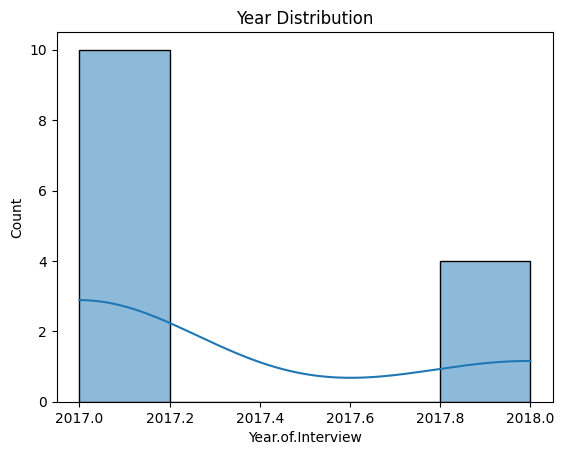

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
# kde=true plots described as estimate to smooth the distribution and show on the plot as a line. just another way to view the data as a line
sns.histplot(data['Year.of.Interview'], kde=True)
plt.title('Year Distribution')
plt.show()

